# Country_wide_COVID 19_Datasets 

Content
The dataset contains data about the numbers of tests, cases, deaths, serious/critical cases, active cases and recovered cases in each country for every day since April 18, and also contains the population of each country to calculate per-capita penetration of the virus

Additionally, an auxiliary table with information about the fraction of the general population at different age groups for every country is added (taken from Wikipedia). This is specifically relevant since COVID-19 death rate is very much age dependent.

# Acknowledgements
The people at "www.worldometers.info" collecting and maintaining this site really are doing very important work
https://www.worldometers.info/coronavirus/#countries

Data about age structure for every country comes from wikipedia

# Inspiration
It's possible to use this dataset for various purposes and analyses
My goal will be to use the additional data about the number of tests performed in each country to estimate the true death rate of COVID-19 and examine the relationship with age .(Consider the both files for understanding the scenario.)



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/worldometer_snapshots_April18_to_May18.csv



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/population_structure_by_age_per_contry.csv

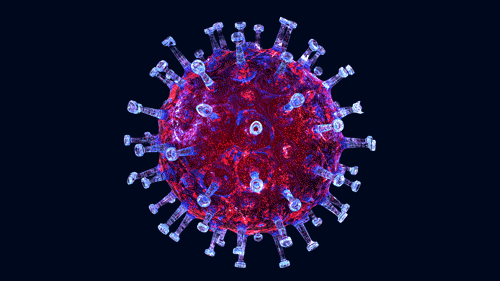

In [1]:
#lets import the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image
Image("giphy.gif",width=400)

In [2]:
covid_case=pd.read_csv('covid_case.csv',parse_dates=['Date'])
population=pd.read_csv('population.csv')

In [3]:
#covid_case worldwide
covid_case

Date                Country  Population  Total Tests  Total Cases  \
0    2020-04-18                    USA   330774664    3722145.0     738792.0   
1    2020-04-18                 Russia   145927292    1831892.0      36793.0   
2    2020-04-18                  Spain    46752703     930230.0     194416.0   
3    2020-04-18                 Brazil   212380932      62985.0      36722.0   
4    2020-04-18                     UK    67844241     460437.0     114217.0   
...         ...                    ...         ...          ...          ...   
6598 2020-05-18              St. Barth        9874          NaN          6.0   
6599 2020-05-18         Western Sahara      595462          NaN          6.0   
6600 2020-05-18               Anguilla       14987          NaN          3.0   
6601 2020-05-18                Lesotho     2140235          NaN          1.0   
6602 2020-05-18  Saint Pierre Miquelon        5797          NaN          1.0   

      Total Deaths  Total Recovered  Serious or Critical  Active Cases  
0          39014.0          68269.0              13551.0      631509.0  
1            313.0           3057.0                  8.0       33423.0  
2          20043.0          74797.0               7371.0       99576.0  
3           2361.0          14026.0               6634.0       20335.0  
4          15464.0              NaN               1559.0       98409.0  
...            ...              ...                  ...           ...  
6598           NaN              6.0                  NaN           0.0  
6599           NaN              6.0                  NaN           0.0  
6600           NaN              3.0                  NaN           0.0  
6601           NaN              NaN                  NaN           1.0  
6602           NaN              1.0                  NaN           0.0  

[6603 rows x 9 columns]

In [4]:
#population age fraction worlwide
population.head()

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0     USA                    0.189                     0.657   
1  Russia                    0.176                     0.682   
2   Spain                    0.147                     0.659   
3  Brazil                    0.217                     0.697   
4      UK                    0.177                     0.638   

   Fraction age 65+ years  
0                   0.154  
1                   0.142  
2                   0.194  
3                   0.086  
4                   0.185

In [5]:
#lets check the datatypes
covid_case.dtypes

Date                   datetime64[ns]
Country                        object
Population                      int64
Total Tests                   float64
Total Cases                   float64
Total Deaths                  float64
Total Recovered               float64
Serious or Critical           float64
Active Cases                  float64
dtype: object

In [6]:
covid_case

Date                Country  Population  Total Tests  Total Cases  \
0    2020-04-18                    USA   330774664    3722145.0     738792.0   
1    2020-04-18                 Russia   145927292    1831892.0      36793.0   
2    2020-04-18                  Spain    46752703     930230.0     194416.0   
3    2020-04-18                 Brazil   212380932      62985.0      36722.0   
4    2020-04-18                     UK    67844241     460437.0     114217.0   
...         ...                    ...         ...          ...          ...   
6598 2020-05-18              St. Barth        9874          NaN          6.0   
6599 2020-05-18         Western Sahara      595462          NaN          6.0   
6600 2020-05-18               Anguilla       14987          NaN          3.0   
6601 2020-05-18                Lesotho     2140235          NaN          1.0   
6602 2020-05-18  Saint Pierre Miquelon        5797          NaN          1.0   

      Total Deaths  Total Recovered  Serious or Critical  Active Cases  
0          39014.0          68269.0              13551.0      631509.0  
1            313.0           3057.0                  8.0       33423.0  
2          20043.0          74797.0               7371.0       99576.0  
3           2361.0          14026.0               6634.0       20335.0  
4          15464.0              NaN               1559.0       98409.0  
...            ...              ...                  ...           ...  
6598           NaN              6.0                  NaN           0.0  
6599           NaN              6.0                  NaN           0.0  
6600           NaN              3.0                  NaN           0.0  
6601           NaN              NaN                  NaN           1.0  
6602           NaN              1.0                  NaN           0.0  

[6603 rows x 9 columns]

# lets Visualize the data with respect to date first

In [7]:
#lets remove the time from date time.
covid_case['Date'] = pd.to_datetime(covid_case['Date']).dt.date

In [8]:
#lets check the data period
print('Data record date :',covid_case['Date'].min())
print('              to :',covid_case['Date'].max())
#observation: we have 1 month data of covid.

Data record date : 2020-04-18
              to : 2020-05-18


In [9]:
#lets plot our data with dates.
covid_case.head()

Date Country  Population  Total Tests  Total Cases  Total Deaths  \
0  2020-04-18     USA   330774664    3722145.0     738792.0       39014.0   
1  2020-04-18  Russia   145927292    1831892.0      36793.0         313.0   
2  2020-04-18   Spain    46752703     930230.0     194416.0       20043.0   
3  2020-04-18  Brazil   212380932      62985.0      36722.0        2361.0   
4  2020-04-18      UK    67844241     460437.0     114217.0       15464.0   

   Total Recovered  Serious or Critical  Active Cases  
0          68269.0              13551.0      631509.0  
1           3057.0                  8.0       33423.0  
2          74797.0               7371.0       99576.0  
3          14026.0               6634.0       20335.0  
4              NaN               1559.0       98409.0

# lets group all the data with Date 

In [10]:
#total test conducted o particular date
total_test = pd.DataFrame(covid_case.groupby('Date')['Total Tests'].sum().sort_values(ascending=False))
total_test['Date'] = total_test.index
total_test.index = np.arange(1,32) 
total_test = total_test[['Date','Total Tests']]

In [11]:
# total confirmed registered case on particular date
covid_Case = pd.DataFrame(covid_case.groupby('Date')['Total Cases'].sum().sort_values(ascending=False))
covid_Case['Date'] = covid_Case.index
covid_Case.index = np.arange(1,32) 
covid_Case = covid_Case[['Date','Total Cases']]

In [12]:
#total registered case on particular date
critical_Case = pd.DataFrame(covid_case.groupby('Date')['Serious or Critical'].sum().sort_values(ascending=False))
critical_Case['Date'] = critical_Case.index
critical_Case.index = np.arange(1,32) 
critical_Case = critical_Case[['Date','Serious or Critical']]

In [13]:
#total Recovered case on particular date
Recovered_Case = pd.DataFrame(covid_case.groupby('Date')['Total Recovered'].sum().sort_values(ascending=False))
Recovered_Case['Date'] = Recovered_Case.index
Recovered_Case.index = np.arange(1,32) 
Recovered_Case = Recovered_Case[['Date','Total Recovered']]

In [14]:
#total Active case on particular date
Active_Case = pd.DataFrame(covid_case.groupby('Date')['Active Cases'].sum().sort_values(ascending=False))
Active_Case['Date'] = Active_Case.index
Active_Case.index = np.arange(1,32) 
Active_Case = Active_Case[['Date','Active Cases']]

In [15]:
#Total Deaths case on particular date
Death_Case = pd.DataFrame(covid_case.groupby('Date')['Total Deaths'].sum().sort_values(ascending=False))
Death_Case['Date'] = Death_Case.index
Death_Case.index = np.arange(1,32) 
Death_Case = Death_Case[['Date','Total Deaths']]

# lets plot total test conducted,total case registered and total critical on particular date.

# Multivariate analysis

In [16]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Total test conducted', x=total_test['Date'], y=total_test['Total Tests']),
     go.Bar(name='Total case registered', x=covid_Case['Date'], y=covid_Case['Total Cases']),
     go.Bar(name='Total critical test registered', x=critical_Case['Date'], y=critical_Case['Serious or Critical']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

In [17]:
covid_case

Date                Country  Population  Total Tests  Total Cases  \
0     2020-04-18                    USA   330774664    3722145.0     738792.0   
1     2020-04-18                 Russia   145927292    1831892.0      36793.0   
2     2020-04-18                  Spain    46752703     930230.0     194416.0   
3     2020-04-18                 Brazil   212380932      62985.0      36722.0   
4     2020-04-18                     UK    67844241     460437.0     114217.0   
...          ...                    ...         ...          ...          ...   
6598  2020-05-18              St. Barth        9874          NaN          6.0   
6599  2020-05-18         Western Sahara      595462          NaN          6.0   
6600  2020-05-18               Anguilla       14987          NaN          3.0   
6601  2020-05-18                Lesotho     2140235          NaN          1.0   
6602  2020-05-18  Saint Pierre Miquelon        5797          NaN          1.0   

      Total Deaths  Total Recovered  Serious or Critical  Active Cases  
0          39014.0          68269.0              13551.0      631509.0  
1            313.0           3057.0                  8.0       33423.0  
2          20043.0          74797.0               7371.0       99576.0  
3           2361.0          14026.0               6634.0       20335.0  
4          15464.0              NaN               1559.0       98409.0  
...            ...              ...                  ...           ...  
6598           NaN              6.0                  NaN           0.0  
6599           NaN              6.0                  NaN           0.0  
6600           NaN              3.0                  NaN           0.0  
6601           NaN              NaN                  NaN           1.0  
6602           NaN              1.0                  NaN           0.0  

[6603 rows x 9 columns]

# lets plot  total case registered,Total Deaths,Total Recovered,Active Cases on particular date.

In [18]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Total Cases Registered', x=covid_Case['Date'], y=covid_Case['Total Cases']),
     go.Bar(name='Total Deaths registered', x=Death_Case['Date'], y=Death_Case['Total Deaths']),
     go.Bar(name='Total Recovered case Noticed', x=Recovered_Case['Date'], y=Recovered_Case['Total Recovered']),
    go.Bar(name='Total Active case Noticed', x=Active_Case['Date'], y=Active_Case['Active Cases']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

# lets plot the INDIA cases

In [19]:
#lets check the India data
India_data=covid_case.loc[covid_case['Country'] == 'India']
India_data.head()

Date Country  Population  Total Tests  Total Cases  Total Deaths  \
10   2020-04-18   India  1378381772     335123.0      16365.0         521.0   
223  2020-04-19   India  1378381772     401586.0      17615.0         559.0   
436  2020-04-20   India  1378381772     401586.0      18539.0         592.0   
649  2020-04-21   India  1378381772     447812.0      20080.0         645.0   
862  2020-04-22   India  1378381772     462621.0      21370.0         681.0   

     Total Recovered  Serious or Critical  Active Cases  
10            2463.0                  NaN       13381.0  
223           2854.0                  NaN       14202.0  
436           3273.0                  NaN       14674.0  
649           3975.0                  NaN       15460.0  
862           4370.0                  NaN       16319.0

# observation:
    1. we can observe that the critical case data is not there so lets just drop the serious or critical columns.

In [20]:
import warnings
warnings.filterwarnings('ignore')
India_data.drop(columns='Serious or Critical',inplace=True)

In [21]:
#observation: we dropped the Serious or Critical columns.
India_data.head()

Date Country  Population  Total Tests  Total Cases  Total Deaths  \
10   2020-04-18   India  1378381772     335123.0      16365.0         521.0   
223  2020-04-19   India  1378381772     401586.0      17615.0         559.0   
436  2020-04-20   India  1378381772     401586.0      18539.0         592.0   
649  2020-04-21   India  1378381772     447812.0      20080.0         645.0   
862  2020-04-22   India  1378381772     462621.0      21370.0         681.0   

     Total Recovered  Active Cases  
10            2463.0       13381.0  
223           2854.0       14202.0  
436           3273.0       14674.0  
649           3975.0       15460.0  
862           4370.0       16319.0

In [22]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Total test conducted', x=India_data['Date'], y=India_data['Total Tests']),
     go.Bar(name='Total case registered', x=India_data['Date'], y=India_data['Total Cases']),
     go.Bar(name='Total Deaths', x=India_data['Date'], y=India_data['Total Deaths']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

In [23]:
import warnings
warnings.filterwarnings('ignore')
#lets check the population  fraction of india of india
#lets check the India data
India_population=population.loc[population['Country'] == 'India']
India_population['Population']=('1378381772')

In [24]:
India_population

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
10   India                    0.278                     0.662   

    Fraction age 65+ years  Population  
10                    0.06  1378381772

In [25]:
col=['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']
for i in col:
    India_population[i] *= India_population['Population'].astype('int64')

In [26]:
India_population

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
10   India             3.831901e+08              9.124887e+08   

    Fraction age 65+ years  Population  
10             82702906.32  1378381772

In [27]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Age 0-14 years Population', x=India_population['Country'], y=India_population['Fraction age 0-14 years']),
     go.Bar(name='Age 15-64 years Population', x=India_population['Country'], y=India_population['Fraction age 15-64 years']),
     go.Bar(name='age 65+ years Population', x=India_population['Country'], y=India_population['Fraction age 65+ years']),
    go.Bar(name='Total India Population', x=India_population['Country'], y=India_population['Population']),
])
# Change the bar mode
fig.update_layout(barmode='group')
#fig.show()
plotly.offline.iplot(fig)

# Observation:
We can observe by the plot that we have almost 1.38 billion population in India, irespective of Age.

        1. we can observe that the 28% of Total population which is almost(393.190 Million) belongs to Age between 0-14, so we can say that In india the age from 0-14 are at the risk of having covid is 28% of Total population.
        
        2. Similarly we can observe that 66.5% of Total Population which is almost(912.488 Million) Belongs to the age group 15-64 , which is the highest population group in india is having at a risk having covid disease of 66.5% of total population.
        
        3. As per the W.H.O Analysis there study defines that the people from the age group above 65+ having the higher risk of affecting by this disease so 6% of total population that is 82.70 Million i number which belongs to age above 65+ year they are at the higher risk of getting affected by this disease.
    

In [28]:
covid_case

Date                Country  Population  Total Tests  Total Cases  \
0     2020-04-18                    USA   330774664    3722145.0     738792.0   
1     2020-04-18                 Russia   145927292    1831892.0      36793.0   
2     2020-04-18                  Spain    46752703     930230.0     194416.0   
3     2020-04-18                 Brazil   212380932      62985.0      36722.0   
4     2020-04-18                     UK    67844241     460437.0     114217.0   
...          ...                    ...         ...          ...          ...   
6598  2020-05-18              St. Barth        9874          NaN          6.0   
6599  2020-05-18         Western Sahara      595462          NaN          6.0   
6600  2020-05-18               Anguilla       14987          NaN          3.0   
6601  2020-05-18                Lesotho     2140235          NaN          1.0   
6602  2020-05-18  Saint Pierre Miquelon        5797          NaN          1.0   

      Total Deaths  Total Recovered  Serious or Critical  Active Cases  
0          39014.0          68269.0              13551.0      631509.0  
1            313.0           3057.0                  8.0       33423.0  
2          20043.0          74797.0               7371.0       99576.0  
3           2361.0          14026.0               6634.0       20335.0  
4          15464.0              NaN               1559.0       98409.0  
...            ...              ...                  ...           ...  
6598           NaN              6.0                  NaN           0.0  
6599           NaN              6.0                  NaN           0.0  
6600           NaN              3.0                  NaN           0.0  
6601           NaN              NaN                  NaN           1.0  
6602           NaN              1.0                  NaN           0.0  

[6603 rows x 9 columns]

# lets plot all the data together we can observe that we have 1 month of data from april 18 to may 18 2020 so lets do EDA for whole world togeather.

In [29]:
# lets seperate confirmed cases to a seperate column according to the countries
confirmedcases = pd.DataFrame(covid_case.groupby('Country')['Total Cases'].sum())
confirmedcases['Country'] = confirmedcases.index #lets set index so that we can plot and use it further
confirmedcases.index = np.arange(1,214) 
confirmedcases = confirmedcases[['Country','Total Cases']]

# lets seperate active cases to a seperate column according to the countries
activecases = pd.DataFrame(covid_case.groupby('Country')['Active Cases'].sum())
activecases['Country'] = activecases.index
activecases.index = np.arange(1,214) 
activecases = activecases[['Country','Active Cases']]



# lets seperate recovered cases to a seperate column according to the countries
recoveredcases = pd.DataFrame(covid_case.groupby('Country')['Total Recovered'].sum())
recoveredcases['Country'] = recoveredcases.index
recoveredcases.index = np.arange(1,214) 
recoveredcases = recoveredcases[['Country','Total Recovered']]

# lets seperate death cases to a seperate column according to the countries
deathcases = pd.DataFrame(covid_case.groupby('Country')['Total Deaths'].sum())
deathcases['Country'] = deathcases.index
deathcases.index = np.arange(1,214) 
deathcases = deathcases[['Country','Total Deaths']]
deathcases.to_excel('m.xlsx')

# lets seperate critical cases to a seperate column according to the countries
criticalcases = pd.DataFrame(covid_case.groupby('Country')['Serious or Critical'].sum())
criticalcases['Country'] = criticalcases.index
criticalcases.index = np.arange(1,214) 
criticalcases = criticalcases[['Country','Serious or Critical']]

# lets seperate Total cases to a seperate column according to the countries
TotalTests = pd.DataFrame(covid_case.groupby('Country')['Total Tests'].sum())
TotalTests['Country'] = TotalTests.index
TotalTests.index = np.arange(1,214)
TotalTests = TotalTests[['Country','Total Tests']]

#lets take the population count in one columns
y=pd.DataFrame(covid_case['Population'].drop_duplicates())
total_population=pd.concat([population,y],axis=1)
col=['Fraction age 0-14 years','Fraction age 15-64 years','Fraction age 65+ years']
for i in col:
    total_population[i] *= total_population['Population'].astype('int64')


# Top 20 Most Affected Countries in the world

In [30]:
# I am plotting Total test cases based on countries.
fig = px.bar(TotalTests.sort_values('Total Tests',ascending=False)[:20][::-1],x='Total Tests',y='Country',title='Total tests conducted Worldwide',text='Total Tests', height=800, orientation='h')
fig.show()

In [31]:
# I am plotting confirmed cases based on countries.
fig = px.bar(confirmedcases.sort_values('Total Cases',ascending=False)[:20][::-1],x='Total Cases',y='Country',title='Covid-19 Confirmed Cases Worldwide',text='Total Cases', height=800, orientation='h')
fig.show()

In [32]:
# I am plotting Critical cases based on countries.
fig = px.bar(criticalcases.sort_values('Serious or Critical',ascending=False)[:20][::-1],x='Serious or Critical',y='Country',title='Critical Cases observed Worldwide',text='Serious or Critical', height=800, orientation='h')
fig.show()

In [33]:
# I am plotting Total deaths based on countries.
fig = px.bar(deathcases.sort_values('Total Deaths',ascending=False)[:20][::-1],x='Total Deaths',y='Country',title='Total Deaths worldwide',text='Total Deaths', height=800, orientation='h')
fig.show()

In [34]:
# I am plotting Total Recovered cases based on countries.
fig = px.bar(recoveredcases.sort_values('Total Recovered',ascending=False)[:20][::-1],x='Total Recovered',y='Country',title='Total Recovered cases observed worldwide',text='Total Recovered', height=800, orientation='h')
fig.show()

# Lets plot the population count as per the country and age fraction seperately

In [35]:
total_population.head()
# we can observe in the Total population data set that my total population is given but Fraction age data is missing any how will do the Visualisation with population

Country  Fraction age 0-14 years  Fraction age 15-64 years  \
0     USA             6.251641e+07              2.173190e+08   
1  Russia             2.568320e+07              9.952241e+07   
2   Spain             6.872647e+06              3.081003e+07   
3  Brazil             4.608666e+07              1.480295e+08   
4      UK             1.200843e+07              4.328463e+07   

   Fraction age 65+ years  Population  
0            5.093930e+07   330774664  
1            2.072168e+07   145927292  
2            9.070024e+06    46752703  
3            1.826476e+07   212380932  
4            1.255118e+07    67844241

In [36]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Age 0-14 years Population', x=total_population['Country'], y=total_population['Fraction age 0-14 years']),
     go.Bar(name='Age 15-64 years Population', x=total_population['Country'], y=total_population['Fraction age 15-64 years']),
     go.Bar(name='age 65+ years Population', x=total_population['Country'], y=India_population['Fraction age 65+ years']),
    go.Bar(name='Total World Population', x=total_population['Country'], y=total_population['Population']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

# Observation:
We can observe by the plot that we have almost 1.38 billion population in India, irespective of Age.

        1. we can observe that the 28% of Total population which is almost(393.190 Million) belongs to Age between 0-14, so we can say that In india the age from 0-14 are at the risk of having covid is 28% of Total population.
        
        2. Similarly we can observe that 66.5% of Total Population which is almost(912.488 Million) Belongs to the age group 15-64 , which is the highest population group in india is having at a risk having covid disease of 66.5% of total population.
        
        3. As per the W.H.O Analysis there study defines that the people from the age group above 65+ having the higher risk of affecting by this disease so 6% of total population that is 82.70 Million i number which belongs to age above 65+ year they are at the higher risk of getting affected by this disease.
    

# lets plot the covid cases 1 month data from date 18 april 2020 to 18 may 2020 worldwide

In [37]:
all_data = pd.DataFrame(covid_case.groupby('Country')['Total Tests','Total Cases','Total Deaths','Total Recovered','Serious or Critical','Active Cases'].sum())
all_data.reset_index(inplace=True)

In [38]:
#lets check all the data
all_data.head()

Country  Total Tests  Total Cases  Total Deaths  Total Recovered  \
0  Afghanistan     382382.0      97988.0        2740.0          12268.0   
1      Albania     273700.0      24227.0         915.0          16353.0   
2      Algeria     198359.0     142955.0       14356.0          65672.0   
3      Andorra      58094.0      23061.0        1359.0          14214.0   
4       Angola      62123.0       1079.0          63.0            316.0   

   Serious or Critical  Active Cases  
0                246.0       83202.0  
1                142.0        6983.0  
2                882.0       63102.0  
3                410.0        7488.0  
4                  0.0         700.0

# Multivariate analysis

In [39]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Total Test conducted ', x=all_data['Country'], y=all_data['Total Tests']),
    go.Bar(name='Total Cases Registered ', x=all_data['Country'], y=all_data['Total Cases']),
    go.Bar(name='Total Deaths Registered ', x=all_data['Country'], y=all_data['Total Deaths']),
    go.Bar(name='Total Active case Noticed', x=all_data['Country'], y=all_data['Active Cases']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

# observation: lets take USA country and try to analyze, this is the 1 month data
we can observe that total test conducted In USA is 232 million from the population 330.774 million.

1. we can observe that the Total case registered in USA is 36.1965 Million out of the population 330.774 Million                       population.
2. Out of 36.1965 million 2.10M death case has been also registered.
4. So after the death total active case is around 28.1154M case is till there.

In [40]:
#multivariate analysis
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure(data=[
    go.Bar(name='Critical case ', x=all_data['Country'], y=all_data['Serious or Critical']),
    go.Bar(name='Total Cases Registered ', x=all_data['Country'], y=all_data['Total Cases']),
    go.Bar(name='Total Deaths Registered ', x=all_data['Country'], y=all_data['Total Deaths']),
    go.Bar(name='Total Recovered case Noticed', x=all_data['Country'], y=all_data['Total Recovered']),

])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

In [41]:
#before moving further lets save our data for Model training
data=all_data.copy()

# lets extract the country code So that we an plot my data o World map

In [42]:
# extracting alpha3code for the country to extract the 3 letter country code
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
all_data['CODE']=alpha3code(all_data.Country)
all_data.head()
# reference: https://towardsdatascience.com/

Country  Total Tests  Total Cases  Total Deaths  Total Recovered  \
0  Afghanistan     382382.0      97988.0        2740.0          12268.0   
1      Albania     273700.0      24227.0         915.0          16353.0   
2      Algeria     198359.0     142955.0       14356.0          65672.0   
3      Andorra      58094.0      23061.0        1359.0          14214.0   
4       Angola      62123.0       1079.0          63.0            316.0   

   Serious or Critical  Active Cases CODE  
0                246.0       83202.0  AFG  
1                142.0        6983.0  ALB  
2                882.0       63102.0  DZA  
3                410.0        7488.0  AND  
4                  0.0         700.0  AGO

In [43]:
# so after extracting we can see above that still there is Mising data in country code, 
#lets use iso fuzzywuzzy the code again to get the maximum country code
list_countries = all_data['Country'].unique().tolist()
# print(list_countries) # Uncomment to see list of countries
d_country_code = {}  # To hold the country names and their ISO
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        # country_data is a list of objects of class pycountry.db.Country
        # The first item  ie at index 0 of list is best fit
        # object of class Country have an alpha_3 attribute
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        # If could not find country, make ISO code ' '
        d_country_code.update({country: ' '})

# print(d_country_code) # Uncomment to check dictionary  

# create a new column iso_alpha in the df
# and fill it with appropriate iso 3 code
for k, v in d_country_code.items():
    all_data.loc[(all_data.Country == k), 'iso_alpha'] = v

could not add ISO 3 code for -> Caribbean Netherlands
could not add ISO 3 code for -> Channel Islands
could not add ISO 3 code for -> DRC
could not add ISO 3 code for -> Faeroe Islands
could not add ISO 3 code for -> Ivory Coast
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> S. Korea
could not add ISO 3 code for -> Saint Pierre Miquelon
could not add ISO 3 code for -> St. Barth
could not add ISO 3 code for -> St. Vincent Grenadines
could not add ISO 3 code for -> UAE


# Plotting all the data on world map

In [44]:
# choropleth map
for col in all_data.columns:
    all_data[col] = all_data[col].astype(str)

all_data['text'] = all_data['Country'] + '<br>' + \
    'Total Tests =' + all_data['Total Tests'] + '<br>' + \
    'Total Cases = ' + all_data['Total Cases'] + '<br>' + \
    'Serious or Critical = ' + all_data['Serious or Critical'] + '<br>' + \
    'Active Cases =' + all_data['Active Cases'] + '<br>' + \
    'Total Recovered = ' + all_data['Total Recovered'] 


    
fig = go.Figure(data=go.Choropleth(
    locations = all_data['iso_alpha'],
    text = all_data['text'],
    z = all_data['Total Deaths'],
    colorscale = 'earth',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
     
    
    colorbar_title = 'Corona Cases in Million'
    
))

fig.update_layout(
    title_text='Covid_case_world_wide',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: https://github.com/khurram-DS',
        showarrow = False
    )]
)

fig.show()
fig.write_html("apr-may_covid_case.html")  
# reference = https://plotly.com/python/choropleth-maps/

# lets plot total death animation using bar race plot.

In [45]:
covid_death= covid_case.groupby(['Date','Country'])[['Total Deaths']].sum()
covid_death=covid_death.reset_index()
covid_death.set_index('Date')
covid_death=pd.DataFrame(covid_death.pivot(index='Date',columns='Country',values='Total Deaths'))
covid_death.head()

Country     Afghanistan  Albania  Algeria  Andorra  Angola  Anguilla  \
Date                                                                   
2020-04-18         30.0     26.0    367.0     35.0     2.0       0.0   
2020-04-19         33.0     26.0    375.0     36.0     2.0       0.0   
2020-04-20         36.0     26.0    384.0     37.0     2.0       0.0   
2020-04-21         36.0     26.0    392.0     37.0     2.0       0.0   
2020-04-22         40.0     27.0    402.0     37.0     2.0       0.0   

Country     Antigua and Barbuda  Argentina  Armenia  Aruba  ...  Ukraine  \
Date                                                        ...            
2020-04-18                  3.0      132.0     20.0    2.0  ...    133.0   
2020-04-19                  3.0      134.0     20.0    2.0  ...    141.0   
2020-04-20                  3.0      142.0     22.0    2.0  ...    151.0   
2020-04-21                  3.0      151.0     24.0    2.0  ...    161.0   
2020-04-22                  3.0      159.0     24.0    2.0  ...    174.0   

Country     Uruguay  Uzbekistan  Vatican City  Venezuela  Vietnam  \
Date                                                                
2020-04-18      9.0         5.0           0.0        9.0      0.0   
2020-04-19     10.0         5.0           0.0        9.0      0.0   
2020-04-20     10.0         5.0           0.0       10.0      0.0   
2020-04-21     12.0         6.0           0.0       10.0      0.0   
2020-04-22     12.0         7.0           0.0       10.0      0.0   

Country     Western Sahara  Yemen  Zambia  Zimbabwe  
Date                                                 
2020-04-18             0.0    0.0     2.0       3.0  
2020-04-19             0.0    0.0     3.0       3.0  
2020-04-20             0.0    0.0     3.0       3.0  
2020-04-21             0.0    0.0     3.0       3.0  
2020-04-22             0.0    0.0     3.0       4.0  

[5 rows x 213 columns]

In [75]:
# reference: https://pythonawesome.com/make-animated-bar-chart-races-with-matplotlib/
# plotting animation bar race plot by taking reference from above wevsite.
import warnings
warnings.filterwarnings('ignore')
import bar_chart_race as bcr
bcr.bar_chart_race(df=covid_death,
    filename='covid_may18.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='Covid death per day for the month april-may',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total Deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Total Deaths Count by countries Between April 18 - May 18',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

In [77]:
from IPython.display import Video
Video("covid_may18.mp4",width=800)

# lets load the data again for Model Training

<AxesSubplot:>

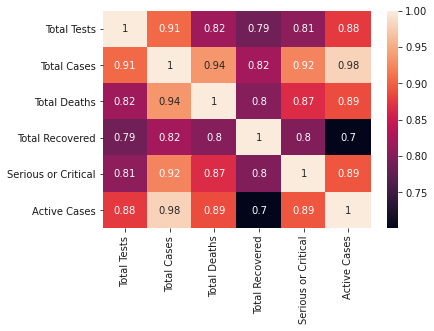

In [47]:
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'Corelation with Target variables')

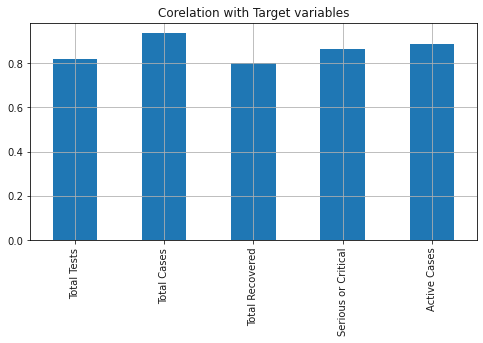

In [48]:
plt.figure(figsize=(8,4))
data.drop('Total Deaths',axis=1).corrwith(data['Total Deaths']).plot(kind='bar',grid=True)
plt.title('Corelation with Target variables')

In [49]:
#lets check the null value present in our dataset
data.isnull().sum()
# we can observe that there is no null value present in the dataset.

Country                0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

In [50]:
#lets check the datatypes
data.dtypes

Country                 object
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

In [51]:
#lets drop the country columns
data.drop(columns='Country',inplace=True)

# To check distribution of skewness

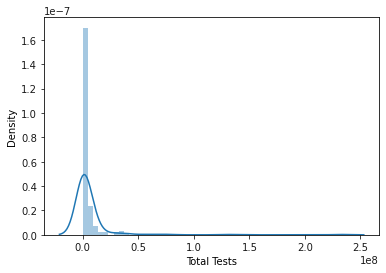

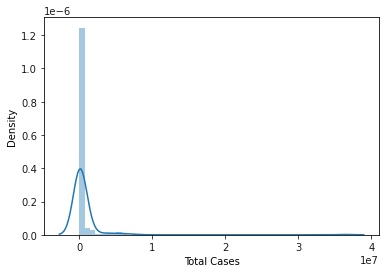

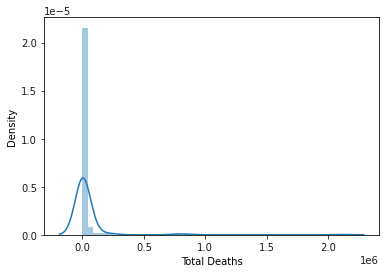

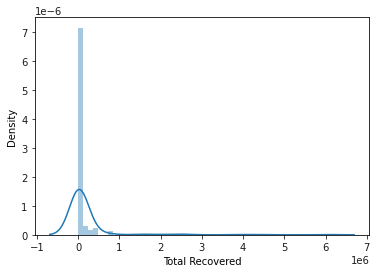

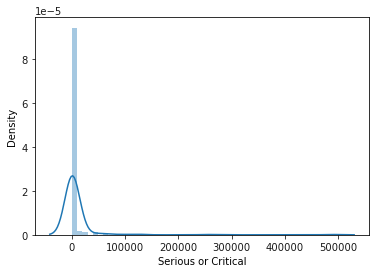

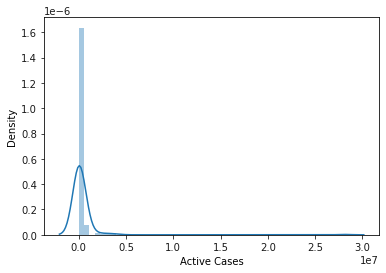

In [52]:
for i in data.columns:
    sns.distplot(data[i])
    plt.show()
#we can observe that my data is left skewed from axis.

In [53]:
# Now let check the skewness and try to remove the skewness.
data.skew()


Total Tests             8.049616
Total Cases            11.496481
Total Deaths            8.378964
Total Recovered         5.950107
Serious or Critical     9.396909
Active Cases           13.101804
dtype: float64

In [54]:
# lets apply log transformation and treat the skewed data
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [55]:
#we can observe that our data is much more skewed.
data.skew()

Total Tests           -0.438077
Total Cases            0.910624
Total Deaths           0.166241
Total Recovered        0.598279
Serious or Critical    0.189311
Active Cases           0.794101
dtype: float64

# Removing Outliers

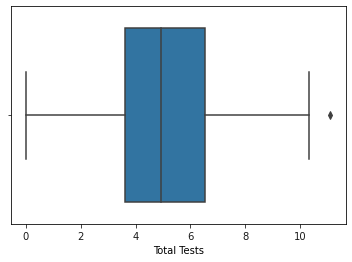

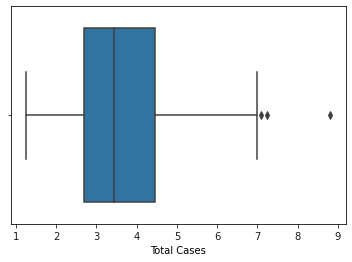

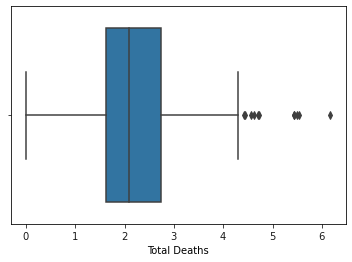

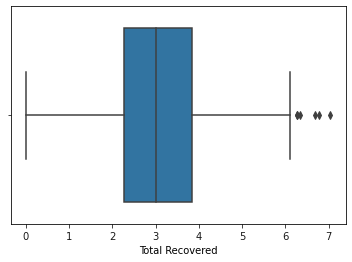

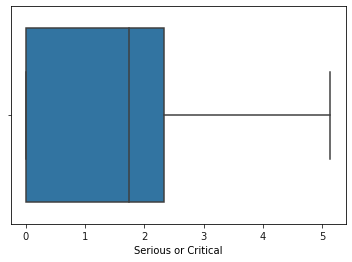

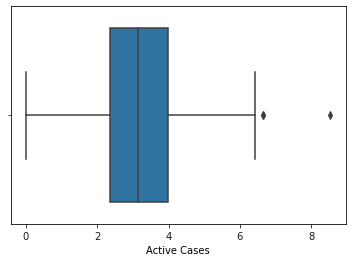

In [56]:
#lets plot the boxplot to identify the outliers.
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

In [57]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(data))
print(data.shape)
new=data.loc[(z<3).all(axis=1)]
print(new.shape)
# we can observe the new zscore down below.

(213, 6)
(212, 6)


# Model Training

As we can observe in this data set , that we have to predict the Total Deaths by taking target variable as Total Deaths.


# Lets apply various regression to predict the Deaths.

In [58]:
# lets sepearate input output columns
df_x=new.drop(columns=['Total Deaths']) # Input variable.
y=pd.DataFrame(new['Total Deaths']) #Target Variable.

In [59]:
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

Total Tests  Total Cases  Total Recovered  Serious or Critical  \
0     0.094154     0.458445         0.099630             0.401804   
1     0.009935    -0.076006         0.200031             0.293106   
2    -0.067894     0.619655         0.740017             0.685168   
3    -0.337589    -0.093218         0.150611             0.509772   
4    -0.323907    -0.978307        -0.907823            -1.235656   

   Active Cases  
0      0.696072  
1     -0.208457  
2      0.580695  
3     -0.186617  
4     -0.831023

In [60]:
#lets again check the skewness
x.skew()

Total Tests           -0.505441
Total Cases            0.752487
Total Recovered        0.520895
Serious or Critical    0.117617
Active Cases           0.579919
dtype: float64

# lets apply various regression to the model

In [61]:
# let import diffrent model library
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
#import ensemble technique
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor



#importing error matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
#lets apply regression to datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y): #Def is used such that we can call it later
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print('max r2 score correponding to',final_r_state,'is',max_r_score)
    print()
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean Squared error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('*******************************************************************')
    print()
    return final_r_state

In [63]:
model=[LinearRegression(),Lasso(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    print('----->>',m,'<<-----')
    r_state=maxr2_score(m,x,y)

----->> LinearRegression() <<-----

max r2 score correponding to 79 is 0.8734787280408027

Error:
Mean absolute error: 0.38485587849711744
Mean Squared error: 0.2584226554257426
Root Mean Squared error: 0.5083528847422257
*******************************************************************

----->> Lasso() <<-----

max r2 score correponding to 57 is 0.23693764784020177

Error:
Mean absolute error: 0.6514843500100106
Mean Squared error: 0.784330759892863
Root Mean Squared error: 0.885624502762239
*******************************************************************

----->> KNeighborsRegressor() <<-----

max r2 score correponding to 46 is 0.8066380666465419

Error:
Mean absolute error: 0.4194434093237945
Mean Squared error: 0.32657870554698065
Root Mean Squared error: 0.5714706515185015
*******************************************************************

----->> SVR() <<-----

max r2 score correponding to 66 is 0.8253483213353524

Error:
Mean absolute error: 0.35635029140467206
Mean Square

In [64]:
#lets cross validate all the model uing FOR loop.
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),Ridge(),ElasticNet(),AdaBoostRegressor()]
for m in model:
    cvs=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Cross val score of',m,'is:')
    print('Cross val score is',cvs)
    print('Mean cross val score of',m,'is',cvs.mean())
    print('Standard deviation of',m,'is',cvs.std())
    print()
    print('*******************************************************************')

Cross val score of LinearRegression() is:
Cross val score is [0.64102393 0.81117625 0.78609471 0.79204096 0.82825786 0.67110884
 0.77398818 0.70756423 0.80960624 0.7453523 ]
Mean cross val score of LinearRegression() is 0.7566213508639229
Standard deviation of LinearRegression() is 0.060455774649530114

*******************************************************************
Cross val score of Lasso() is:
Cross val score is [ 0.13168426  0.07805727  0.17829134 -0.041608   -0.53920113  0.08581408
  0.11199489  0.07479783  0.10458424  0.06840268]
Mean cross val score of Lasso() is 0.025281746807446336
Standard deviation of Lasso() is 0.19555493217468115

*******************************************************************
Cross val score of KNeighborsRegressor() is:
Cross val score is [0.57507246 0.79310202 0.69218344 0.73055693 0.64715446 0.5131389
 0.63947088 0.73444792 0.83676708 0.6629834 ]
Mean cross val score of KNeighborsRegressor() is 0.6824877487686862
Standard deviation of KNeighbors

In [65]:
# lets check the best parameter using grid search cv.
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
rd=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)} 
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=79,test_size=0.20)
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print("R2 Score for Ridge : ",r2_score(y_test,pred)*100)
print('Cross Validation Score for Ridge: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print()
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Ridge :  87.34784527499156
Cross Validation Score for Ridge:  77.02061927909072

Mean absolute error: 0.357821844096985
Mean Squared error: 0.20308804384490353
Root Mean Squared Error : 0.4506529083950347


<AxesSubplot:xlabel='Total Deaths'>

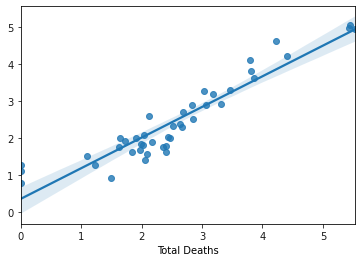

In [67]:
# so by below regplot we can observe that how the test data and predicted data conincides so can say that our model fits best.
sns.regplot(y_test,pred)

In [68]:
#lets test the model
Deaths_worldwide=rd.predict(x)

AxesSubplot(0.125,0.125;0.775x0.755)


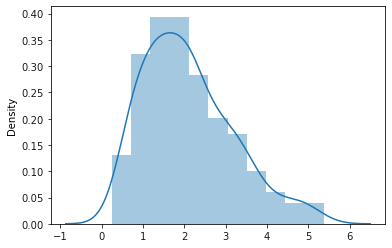

In [69]:
print(sns.distplot([Deaths_worldwide]))

In [70]:
#lets save the model with pickle
import joblib
joblib.dump(rd,'Deaths_worldwide.pkl')

['Deaths_worldwide.pkl']

In [71]:
#lets save the predicted result to excel file.
ds=pd.DataFrame(Deaths_worldwide)
ds.to_csv('Deaths_worldwide.csv')

# Conclusion